In [1]:
import numpy as np
from baseband_analysis.analysis.snr import get_snr
from baseband_analysis.core.signal import *
from baseband_analysis.core.signal import normalize
from baseband_analysis.core.signal import normalize_and_refine
from baseband_analysis.core import BBData
from baseband_analysis.core.signal import get_profile, get_floor, get_main_peak_lim, tiedbeam_baseband_to_power
from baseband_analysis.core.dedispersion import coherent_dedisp
import matplotlib.pyplot as plt
from scipy import signal
import peakutils 
from peakutils import plot as pplot
from baseband_analysis.core.flagging import (
    _get_RFI_channels,
    _get_RFI_spacial,
    _get_valid_time_range,
)
import gc
from chime_frb_api import frb_master
import datetime as dt
gc.collect()

Using hard-coded default config. Run update_from_site_config() toget config from kotekan


--------------------------------------------------------------------------
[[27877,1],0]: A high-performance Open MPI point-to-point messaging module
was unable to find any relevant network interfaces:

Module: OpenFabrics (openib)
  Host: 1bae6bb3b670

Another transport will be used instead, although this may result in
lower performance.

NOTE: You can disable this warning by setting the MCA parameter
btl_base_warn_component_unused to 0.
--------------------------------------------------------------------------


0

In [2]:
frb_master_base_url = "http://frb-vsop.chime:8001"
master = frb_master.FRBMaster(base_url = frb_master_base_url)

event_id = 203935225

r = master.events.get_event(event_number=int(event_id))

burst_time_str = r['measured_parameters'][0]['datetime'][0:19]
burst_time = dt.datetime.strptime(burst_time_str, "%Y-%m-%d %H:%M:%S")
print(burst_time)

year = burst_time.strftime("%Y")
month = burst_time.strftime("%m")
day = burst_time.strftime("%d")

file = '/data/chime/baseband/processed/{}/{}/{}/astro_{}/singlebeam_{}.h5'.format(year, month, day, event_id, event_id)
gc.collect()
print(file)

[2022-11-03 00:45:50,840] INFO Authorization Status: None
[2022-11-03 00:45:50,840] INFO Authorization Method: Tokens
[2022-11-03 00:45:52,502] INFO Authorization Token : Expired
[2022-11-03 00:45:52,503] INFO Reauthorize Method: Tokens
[2022-11-03 00:45:55,506] WARNING It is required that you pass in a value for the "algorithms" argument when calling decode().
[2022-11-03 00:45:55,507] INFO Reauthorize Result: Passed


2021-12-22 03:43:10
/data/chime/baseband/processed/2021/12/22/astro_203935225/singlebeam_203935225.h5


In [3]:
#file = '/data/chime/baseband/processed/2019/06/05/astro_40750656/Trial2_20220320/singlebeam_40750656.h5'
data = BBData.from_file(file)
DM = data['tiedbeam_power'].attrs['DM_coherent']
print(DM)
tiedbeam_baseband_to_power(data,time_downsample_factor=1,dm = DM,dedisperse=True)           
coherent_dedisp(data, DM)

348.9750061035156
0.0 348.9750061035156 348.9750061035156


/data/user-data/ksand/baseband-analysis/baseband_analysis/core/signal.py:895: RuntimeWarning: Mean of empty slice
  power = np.nanmean(power, -1)


0.0 348.9750061035156 348.9750061035156


array([[[-14667.2705  +6974.6553j ,  -3586.499    -797.61676j,
          -8130.4263  -5861.046j  , ...,   1268.1257  -6784.236j  ,
         -10907.865   -9503.487j  ,  -4688.7373  +3893.3157j ],
        [ 11714.428  +11356.016j  ,  -5773.9604 -10120.551j  ,
           4582.161   -2548.7222j , ..., -18107.1     +7697.8345j ,
          -4461.345   +3834.2761j ,  -4932.686   +4390.4233j ]],

       [[ -8009.7114  -7256.084j  ,  -4593.658   -3869.2168j ,
          -1378.2551  -5929.441j  , ...,          nan    +0.j     ,
                  nan    +0.j     ,          nan    +0.j     ],
        [ 10376.847   +4396.1313j ,   6992.5957  -7461.29j   ,
          -9885.293   +3762.4368j , ...,          nan    +0.j     ,
                  nan    +0.j     ,          nan    +0.j     ]],

       [[   809.11395 -6564.6963j ,  11268.664   -5133.2817j ,
           2516.0317  -4112.885j  , ...,          nan    +0.j     ,
                  nan    +0.j     ,          nan    +0.j     ],
        [  2175.0044 

In [7]:
file = '/data/chime/baseband/processed/2018/12/26/astro_23891929/Trial2_20220331/singlebeam_23891929.h5'
#file2 = '/data/chime/baseband/processed/2018/12/25/astro_23789294/Trial1_Ryan/singlebeam_23789294_30+66.h5'
data = BBData.from_file(file)
DM = data["tiedbeam_power"].attrs["DM_coherent"]
print(DM)
gc.collect()

[2022-10-31 19:26:16,922] WARNING The beamformed baseband data is not properly formatted, it will be conjugated for compatibility


346.1443786621


116

In [4]:
dm = 348.901
dsamp = 4
dm_range = None

/data/user-data/ksand/baseband-analysis/baseband_analysis/core/signal.py:112: RuntimeWarning: Mean of empty slice
  if not np.isnan(np.nanmean(power_in[-1], axis=0)).any():
[2022-11-03 00:46:29,383] INFO Applying LTE mask


In the start (868, 72846)
Apply lte mask (868, 72846)
After time range (868, 72846)
Time range (868, 48342)
Inside get weight
After weights (868, 48342)
After downsample (868, 12085)


/data/user-data/ksand/baseband-analysis/baseband_analysis/core/flagging.py:93: RuntimeWarning: Mean of empty slice
  spect = get_spect(np.nanmean(power_beam, axis=-1), thres=thres_mean)
/usr/local/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1671: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)


After RFI clean (868, 12085)
After refine RFI (868, 12085)
Before removing invalid channels (868, 12085)
At the end (801, 12085)


[2022-11-03 00:46:37,060] INFO Applying LTE mask


In the start (868, 72846)
Apply lte mask (868, 72846)
After time range (868, 72846)
Time range (868, 48342)
Inside get weight
After weights (868, 48342)
After downsample (868, 12085)
After RFI clean (868, 12085)
After refine RFI (868, 12085)
Before removing invalid channels (868, 12085)
At the end (801, 12085)


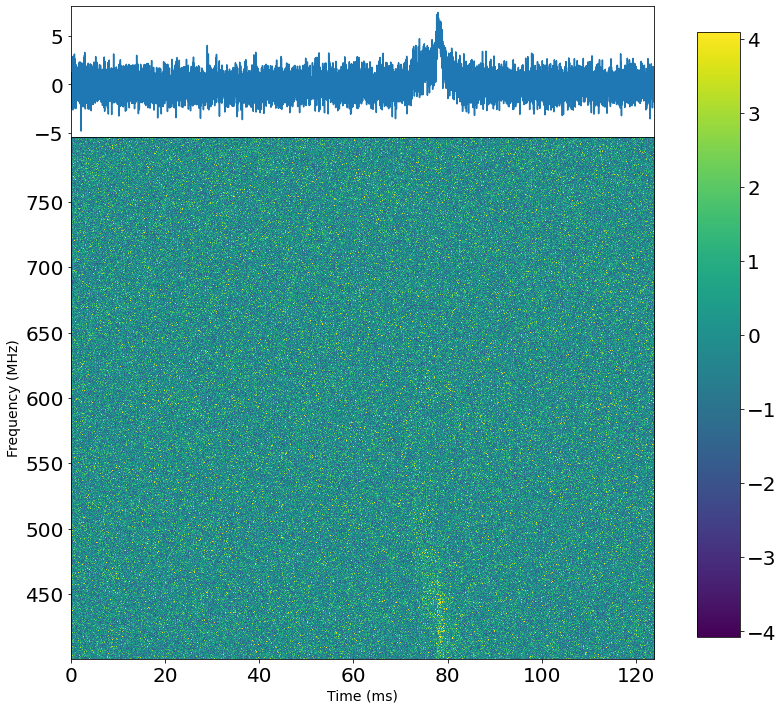

8256

In [5]:
freq_id, freq, power, offset, weight, valid_channels, time_range_out, DM,downsampling_factor,= get_snr(data,
                                                                                                       DM=dm,
                                                                                                       diagnostic_plots=True,
                                                                                                       w=None,
                                                                                                       additional_valid_channels=None,
                                                                                                       lte_mask = True,
                                                                                                       do_rfi_clean = True,
                                                                                                       time_range=None,
                                                                                                       return_full=True,
                                                                                                       spectrum_lim=False,
                                                                                                       floor_mask = None,
                                                                                                       DM_range=dm_range,
                                                                                                       downsample=dsamp,
                                                                                                       refine_RFI=False,
                                                                                                       fill_missing_time=None,
                                                                                                       thres_mean=5,
                                                                                                       thres_std=3,
                                                                                                       doublecheck_RFI=False,
                                                                                                       DM_step=0.01,
                                                                                                       raise_missing_signal=False,
                                                                                                       check_old_process=True,
                                                                                                       check_channel_number=True,
                                                                                                      )
gc.collect()

In [7]:
print(min(freq_id), max(freq_id), min(freq), max(freq))
print(freq_id.shape)

839 1023 400.390625 472.265625
(181,)


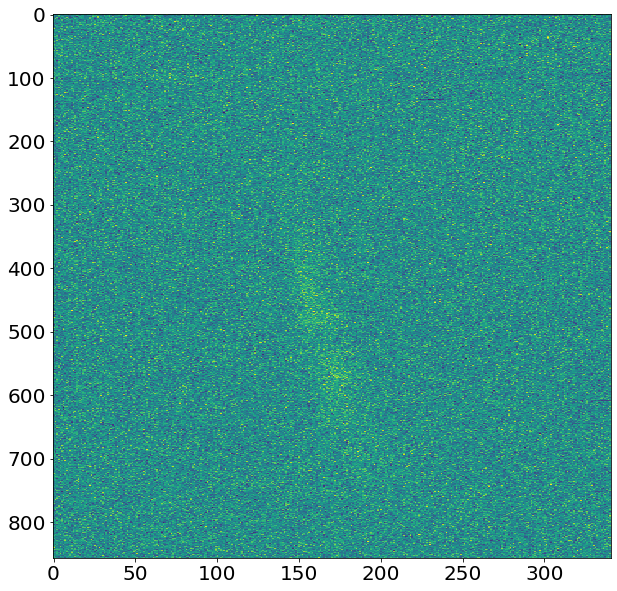

In [39]:
wfall = power
mean, std = np.nanmean(wfall), np.nanstd(wfall)
plt.imshow(
        wfall,
        cmap="viridis",
        origin="upper",
        aspect="auto",
        interpolation="nearest",
        vmin=mean - 4 * std,
        vmax=mean + 4 * std,
    )

In [7]:
x_old = data['tiedbeam_locations']
print(x_old['dec'], x_old['ra'])

[65.71675422 65.71675422] [29.50312583 29.50312583]


In [22]:
x_new =  data['tiedbeam_locations']
print(x_new['dec'], x_new['ra'])

[65.71675422 65.71675422] [29.50312583 29.50312583]


In [24]:
for k in data.items():
    print(k)

('first_packet_recv_time', <memh5 common dataset '/first_packet_recv_time': shape (988,), type "dtype('float64')">)
('tiedbeam_baseband', <memh5 common dataset '/tiedbeam_baseband': shape (988, 2, 200000), type "dtype('complex64')">)
('tiedbeam_locations', <memh5 common dataset '/tiedbeam_locations': shape (2,), type "dtype([('ra', '<f8'), ('dec', '<f8'), ('x_400MHz', '<f8'), ('y_400MHz', '<f8'), ('pol', 'S1')])">)
('tiedbeam_power', <memh5 common dataset '/tiedbeam_power': shape (988, 2, 200000), type "dtype('float32')">)
('time0', <memh5 common dataset '/time0': shape (988,), type "dtype([('fpga_count', '<u8'), ('ctime', '<f8'), ('ctime_offset', '<f8')])">)


In [ ]:
file3 = '/data/chime/baseband/processed/2018/12/26/astro_23891929/singlebeam_23891929.h5'
data = BBData.from_file(file3)
DM = data["tiedbeam_power"].attrs["DM_coherent"]
print(DM)
gc.collect()